# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [3]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")
pd.set_option('display.max_columns', None)

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [4]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index().sort_values(by='Preco_Normal', ascending=False)


,Categoria,Preco_Normal
1,comidas-preparadas,3095.043478
5,lacteos,2385.219239
2,congelados,2108.042553
0,belleza-y-cuidado-personal,1783.556485
3,frutas,1724.473684
6,verduras,1343.296875
4,instantaneos-y-sopas,765.491228


In [5]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)


,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


Digite aqui as categorias:
comidas-preparadas = media abaixo da mediana
lacteos = media acima da mediana
congelados = media acima da mediana
belleza-y-cuidado-personal = media acima da mediana
frutas = media acima da mediana
verduras = media acima da mediana
instantaneos-y-sopas = media acima da mediana


# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [6]:
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
desvio_padrao_por_categoria

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,2210.041719
1,comidas-preparadas,2019.911428
2,congelados,2111.539896
3,frutas,1639.151114
4,instantaneos-y-sopas,1170.232869
5,lacteos,3925.816164
6,verduras,1012.699625


Podemos notar que o desvio padão apresenta numeros muito altos o que é um forte indicativo para outliers.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

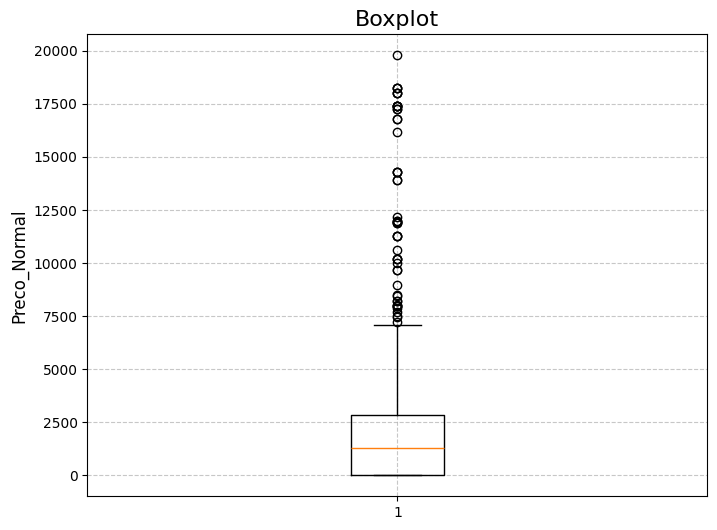

In [39]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Preco_Normal'])

# Legendas e rótulos:
plt.title('Boxplot', fontsize=16)
plt.ylabel('Preco_Normal', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Segundo o boxsplot podemos identificar diversos outliers

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

In [31]:
desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().reset_index()

fig = px.bar(desconto_por_categoria, x='Desconto', y='Categoria', orientation='h',
             title='Salários por Profissão',
             labels={'Desconto': 'Desconto Médio', 'Categoria': 'Categoria'})
fig.show()



# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [33]:
# Aqui agrupamos os dados do DataFrame por profissão e estado civil, e calculando a média do salário para cada profissão e estado civil
desconto_por_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criando o gráfico de treemap com os salários por profissão, usando as cores para representar o estado civil
fig = px.treemap(desconto_por_categoria_marca,
                 path=['Categoria', 'Marca'],
                 values='Desconto',
                 title='Desconto por Categoria e Marca',
                 color='Marca')
# Exibindo o gráfico
fig.show()
